# Кейс задание School of Finance

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('sys_poll1.csv')
df2 = pd.read_csv('sys_poll2.csv')
df3 = pd.read_csv('sys_poll3.csv')
df4 = pd.read_csv('sys_poll4.csv')

## 1. Бизнес-проблема: отсутствие явного понимания того, как должны быть устроены карточки товара для различных категорий
## 2. Цель:  описать приложение в соответствии с текстовыми требованиями розничных продавцов и опросами клиентов
## 3. Используемые данные: опросы потребителей, технические требования розничных продавцов

## 4. Методы анализа данных: EDA (разведочный анализ данных), анализ графиков, разбиение в разные группы

## 5. Анализ данных:

### 5a.Требования к платформе (т.е. карточка товара), основанные на требованиях розничного продавца:

1. Ритейлер одежды:
* 3–5 фотографий
* текстовое описание продукта
2. Ритейлер продуктов для детей:
* видео о продукте
* текстовое описание
* загрузка фото/видео в отзывы на продукт
3. Фармацевтический ритейлер:
* детализированное текстовое описание продукта
* загрузка фото/видео в отзывы на продукт
* возможность для покупателя загрузить подтверждение наличия рецепта, полученного от врача, для продуктов, требующих подтверждение
4. Продуктовый ритейлер:
* 3-5 фотографий
* текстовое описание
* состав
* уведомление покупателя о сроке годности товара до оформления заказа
* возможность загружать дополнительные фотографии в секцию с комментариями

### 5b.Данные, которые необходимо сохранять для розничного продавца:

1. Ритейлер одежды:
* данные о продажах, количестве возвратов/дефектов
* отзывы покупателей
2. Ритейлер продуктов для детей:
* о продажах
* о количестве дефектов
* отзывы клиентов
3. Фармацевтический ритейлер:
* данные о продажах
4. Продуктовый ритейлер (с регулярностью день/неделя):
* о продажах
* о процентах возвратов/отказов
* отзывы покупателей

### 5c, d, e. Описание данных с опроса покупателей. Соответствуют ли потребности клиентов и требования, установленные ритейлерами? Внесённые изменения к требованиям для платформы, опираясь на пользовательский опыт. Визуализация опроса покупателей.

A closing retailer

![Alt text](image.png)

##### Визуализация предпочтений всех пользователей

1000


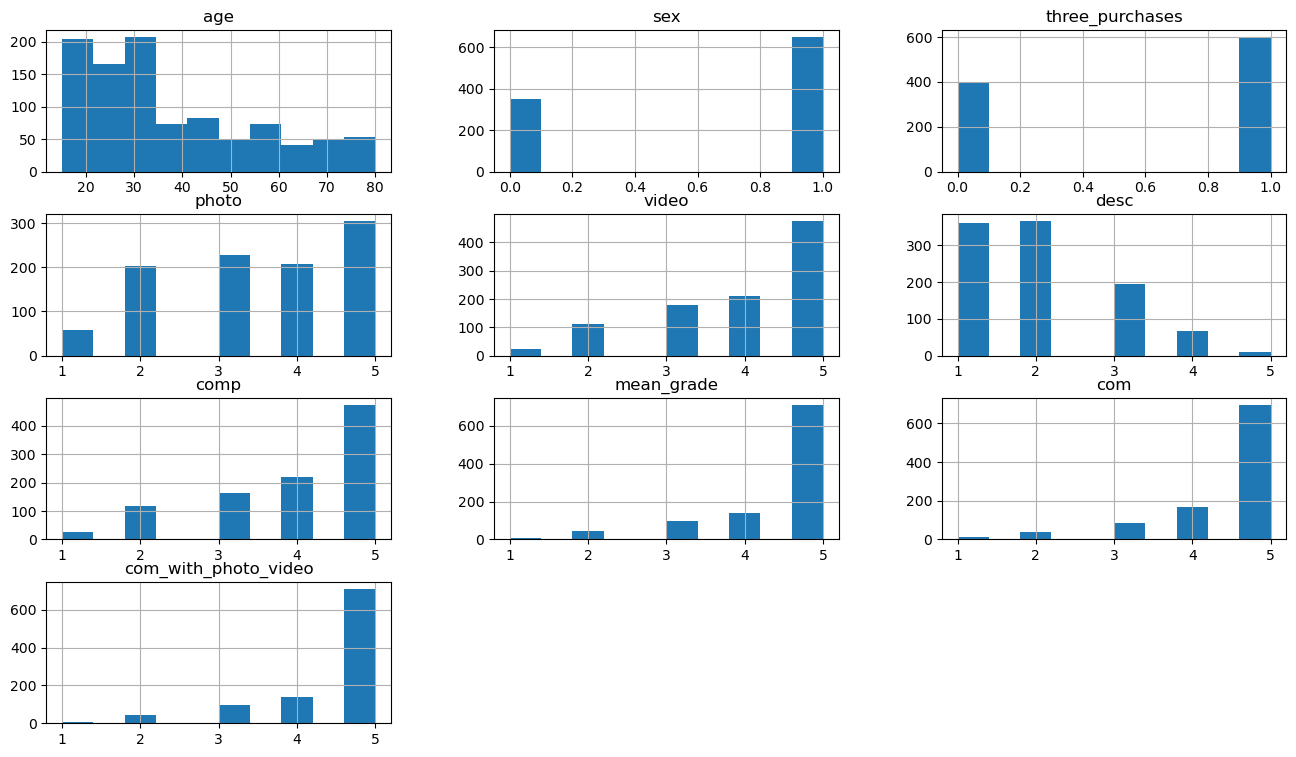

In [3]:
df1.hist(figsize=(16,9))
print(len(df1))

##### Визуализация предпочтений пользователей целевого возраста (18-25 лет)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'three_purchases'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'comp'}>,
        <Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>],
       [<Axes: title={'center': 'com_with_photo_video'}>, <Axes: >,
        <Axes: >]], dtype=object)

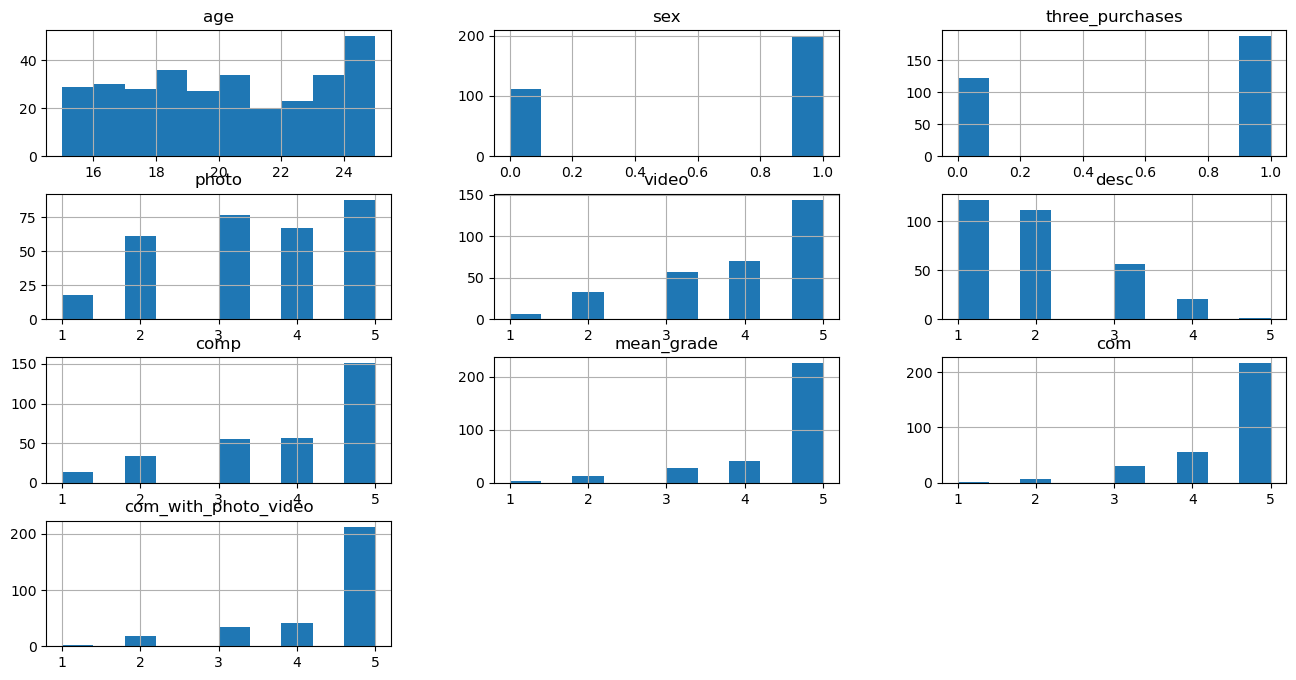

In [4]:
df1[df1['age']<=25].hist(figsize=(16,8))

In [5]:
print(len(df1[(df1['age']<=25) & (df1['three_purchases']>0)]), 'покупателей сделали не менее 3 покупок')

188 покупателей сделали не менее 3 покупок


In [6]:
print(len(df1[(df1['age']<=25) & (df1['three_purchases']==0)]), 'покупателя сделали менее 3 покупок')

123 покупателя сделали менее 3 покупок


##### Визуализация предпочтений пользователей целевого возраста (18-25 лет), которые не менее 3 покупок

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'three_purchases'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'comp'}>,
        <Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>],
       [<Axes: title={'center': 'com_with_photo_video'}>, <Axes: >,
        <Axes: >]], dtype=object)

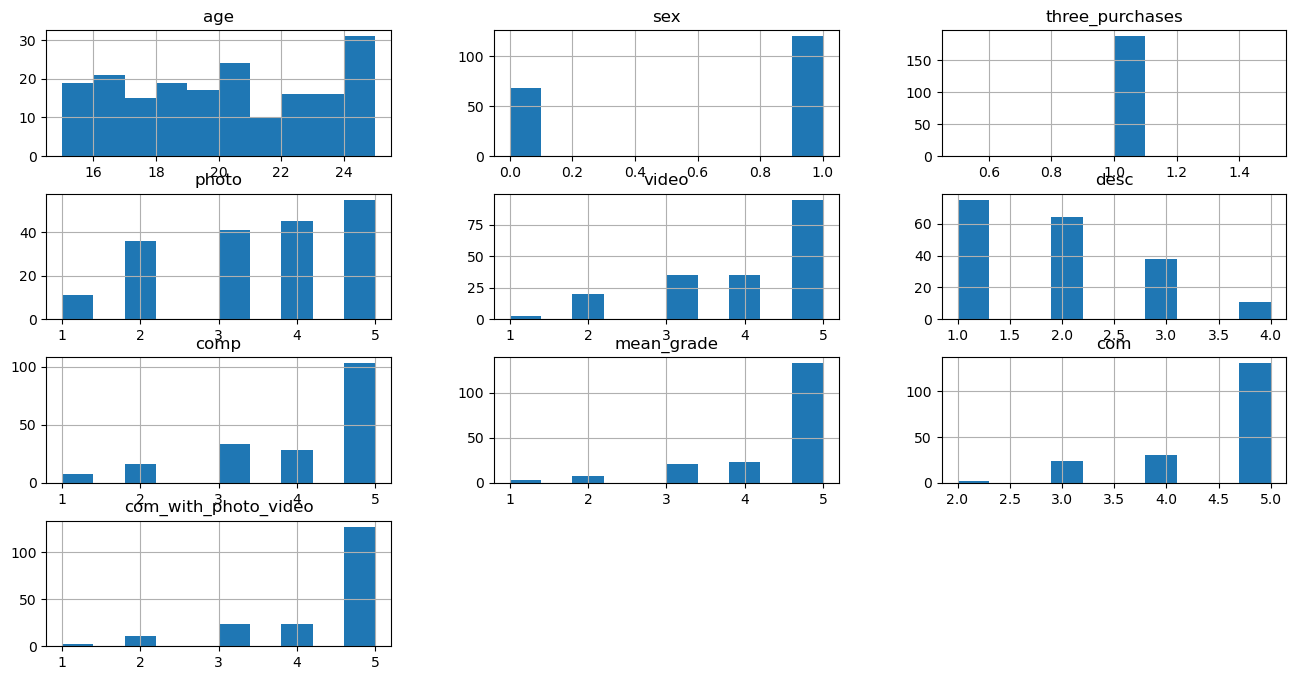

In [7]:
df1[(df1['age']<=25) & (df1['three_purchases']>0)].hist(figsize=(16,8))

##### Визуализация предпочтений пользователей целевого возраста (18-25 лет), которые сделали не менее 3 покупок (только касательно фотографий и текстовых описаний в карточке товара)
Установим трешхолд на удаление функций, предъявленных требованиями ритейлера, на 50%, чтобы карточка товара содержала наиболее полезные функции для различных категорий товаров \
Трешхолд на рекомендации ритейлеру (если функции не было в ТЗ) установим на 20%

In [8]:
df1.columns[3:]

Index(['photo', 'video', 'desc', 'comp', 'mean_grade', 'com',
       'com_with_photo_video'],
      dtype='object')

25.0 процентов пользователей отметили полезность photo в карточке товара как 'меньше 3 из 5 баллов'
12.23404255319149 процентов пользователей отметили полезность video в карточке товара как 'меньше 3 из 5 баллов'
73.93617021276596 процентов пользователей отметили полезность desc в карточке товара как 'меньше 3 из 5 баллов'
12.76595744680851 процентов пользователей отметили полезность comp в карточке товара как 'меньше 3 из 5 баллов'
5.851063829787234 процентов пользователей отметили полезность mean_grade в карточке товара как 'меньше 3 из 5 баллов'
1.0638297872340425 процентов пользователей отметили полезность com в карточке товара как 'меньше 3 из 5 баллов'
6.914893617021277 процентов пользователей отметили полезность com_with_photo_video в карточке товара как 'меньше 3 из 5 баллов'


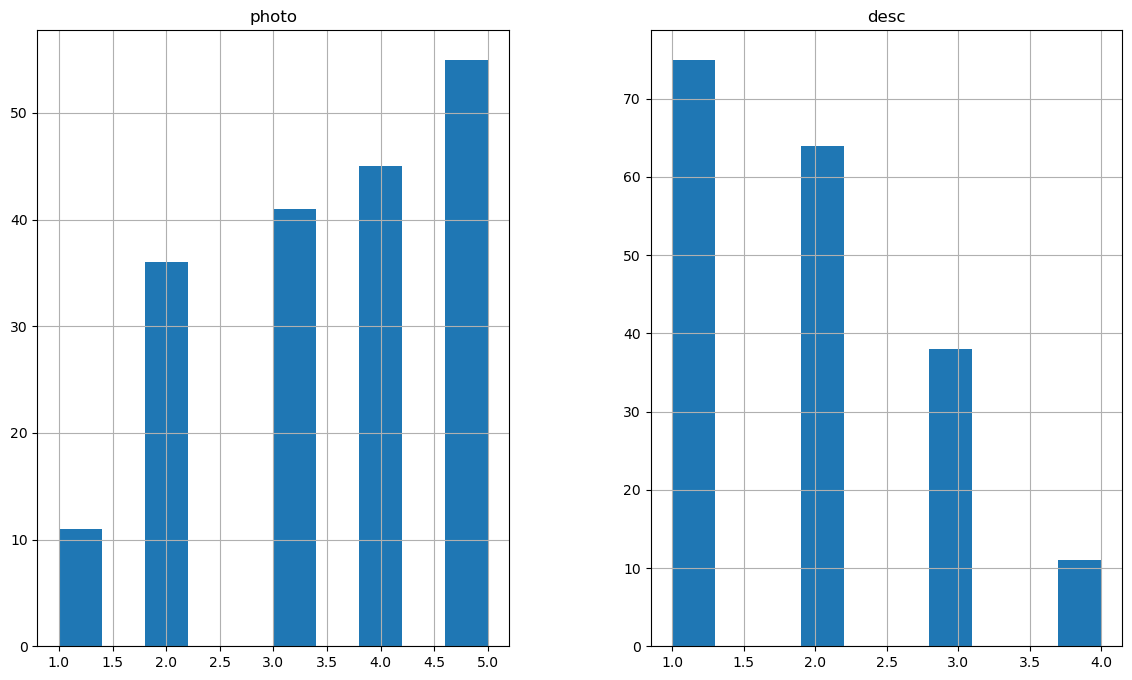

In [9]:
df1[(df1['age']<=25) & (df1['three_purchases']!=0)][['photo', 'desc']].hist(figsize=(14,8))

for i in df1.columns[3:]:
    print(f"{len(df1[(df1['age']<=25) & (df1['three_purchases']!=0) & (df1[i]<3)])/len(df1[(df1['age']<=25) & (df1['three_purchases']!=0)][[i]])*100} процентов пользователей отметили полезность {i} в карточке товара как 'меньше 3 из 5 баллов'")

#### Ритейлер одежды запрашивает, чтобы у товара было текстовое описание, однако, по результатам опроса всех потребителей, потребителей 18-25 лет, потребителей 18-25 лет, которые сделали не менее 3 покупок (наиболее лояльные и склонные отвечать объективнее остальных), можно заметить, что большинство не считает этот функционал полезным. Таким образом, не следует включать раздел с описанием в карточку товара. 
#### Стоит отметить, что пользователи оценили полезность видеороликов, комментариев, комментариев с видео, состав, среднюю оценку товара. Таким образом, стоит узнать у ритейлера, желает ли он видеть эти функции на странице товара.

Ритейлер продуктов для детей

![Alt text](image-1.png)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'three_purchases'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>,
        <Axes: title={'center': 'com_with_photo_video'}>],
       [<Axes: title={'center': 'child_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

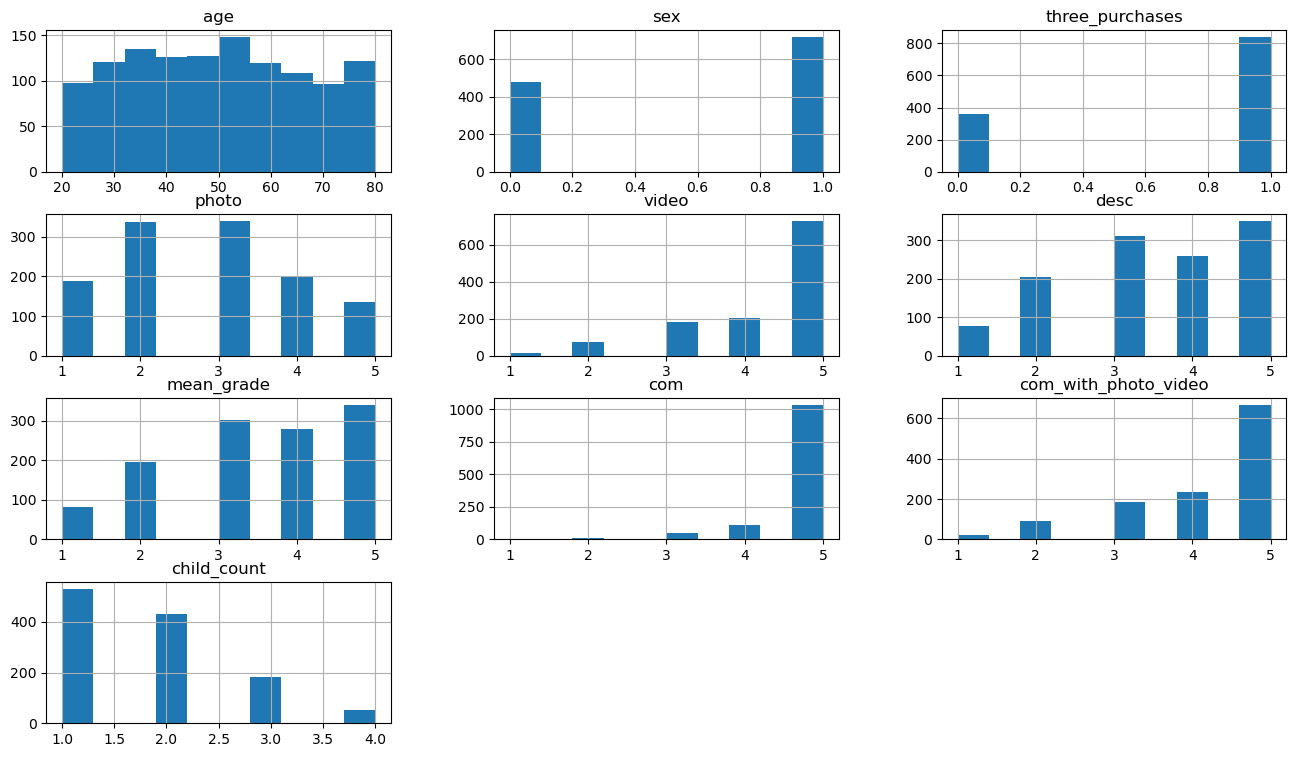

In [10]:
df2.hist(figsize=(16,9))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'three_purchases'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>,
        <Axes: title={'center': 'com_with_photo_video'}>],
       [<Axes: title={'center': 'child_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

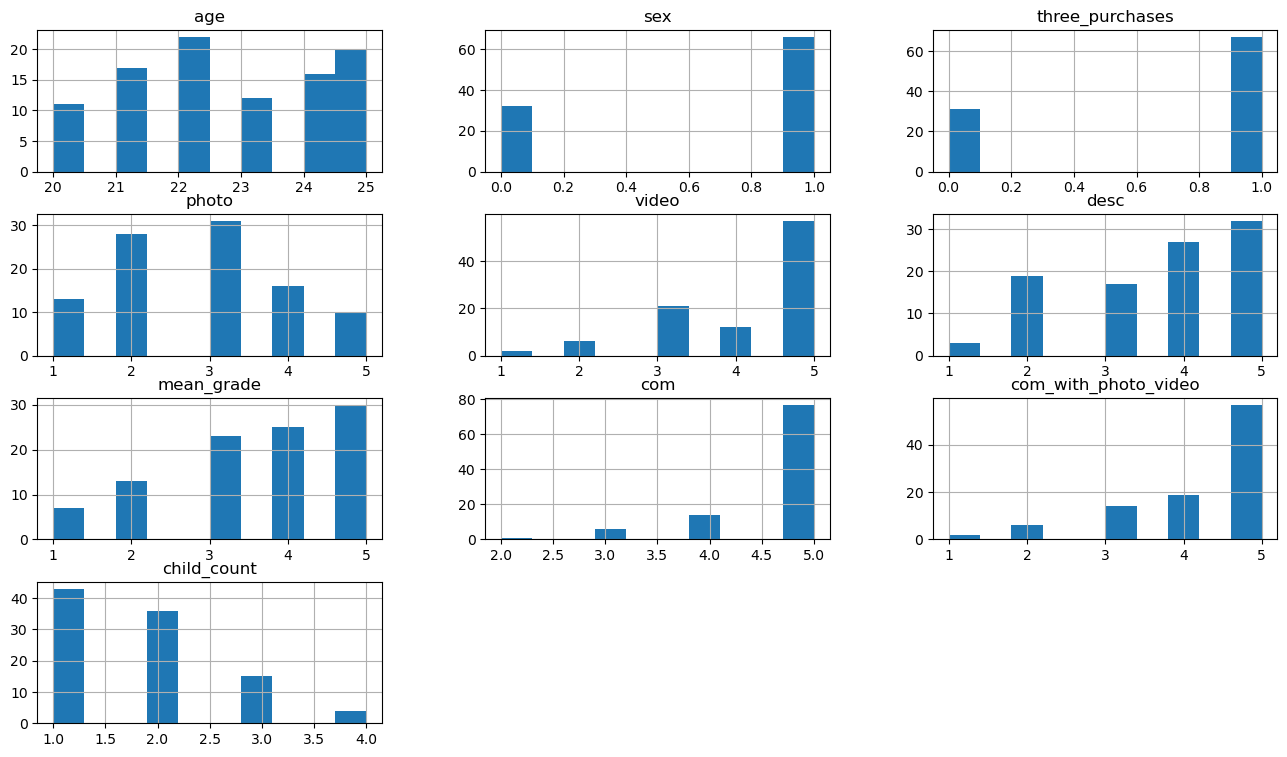

In [11]:
df2[df2['age']<=25].hist(figsize=(16,9))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'three_purchases'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>,
        <Axes: title={'center': 'com_with_photo_video'}>],
       [<Axes: title={'center': 'child_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

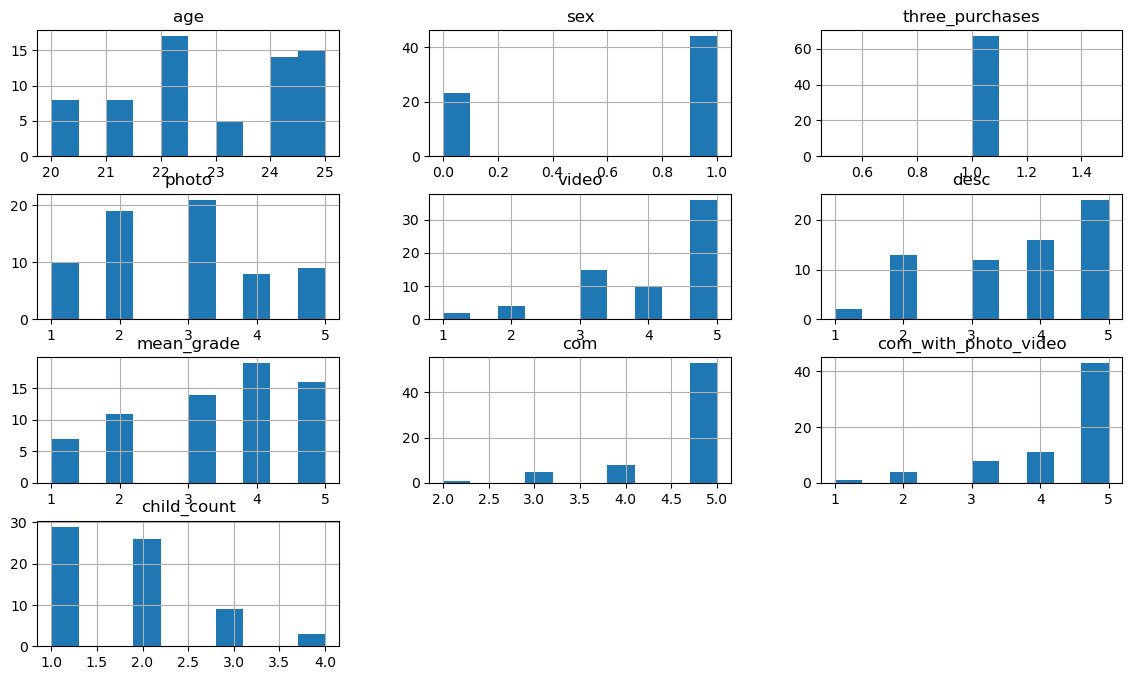

In [12]:
df2[(df2['age']<=25) & (df2['three_purchases']!=0)].hist(figsize=(14,8))

Установим трешхолд на удаление функций, предъявленных требованиями ритейлера, на 50%, чтобы карточка товара содержала наиболее полезные функции для различных категорий товаров \
Трешхолд на рекомендации ритейлеру (если функции не было в ТЗ) установим на 20%

In [13]:
for i in df2.columns[3:-1]:
    print(f"{len(df2[(df2['age']<=25) & (df2['three_purchases']!=0) & (df2[i]<3)])/len(df2[(df2['age']<=25) & (df2['three_purchases']!=0)][[i]])*100} процентов пользователей отметили полезность {i} в карточке товара как 'меньше 3 из 5 баллов'")

43.28358208955223 процентов пользователей отметили полезность photo в карточке товара как 'меньше 3 из 5 баллов'
8.955223880597014 процентов пользователей отметили полезность video в карточке товара как 'меньше 3 из 5 баллов'
22.388059701492537 процентов пользователей отметили полезность desc в карточке товара как 'меньше 3 из 5 баллов'
26.865671641791046 процентов пользователей отметили полезность mean_grade в карточке товара как 'меньше 3 из 5 баллов'
1.4925373134328357 процентов пользователей отметили полезность com в карточке товара как 'меньше 3 из 5 баллов'
7.462686567164178 процентов пользователей отметили полезность com_with_photo_video в карточке товара как 'меньше 3 из 5 баллов'


![Alt text](image-2.png)

#### Изменения в ТЗ: оставить прежним
#### Рекомендации ритейлеру: рассмотреть возможность добавить функцию написания отзывов и отзывов с функцией загрузки видео

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chronic'}>],
       [<Axes: title={'center': 'doctor'}>,
        <Axes: title={'center': 'desc'}>,
        <Axes: title={'center': 'comp'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>, <Axes: >]], dtype=object)

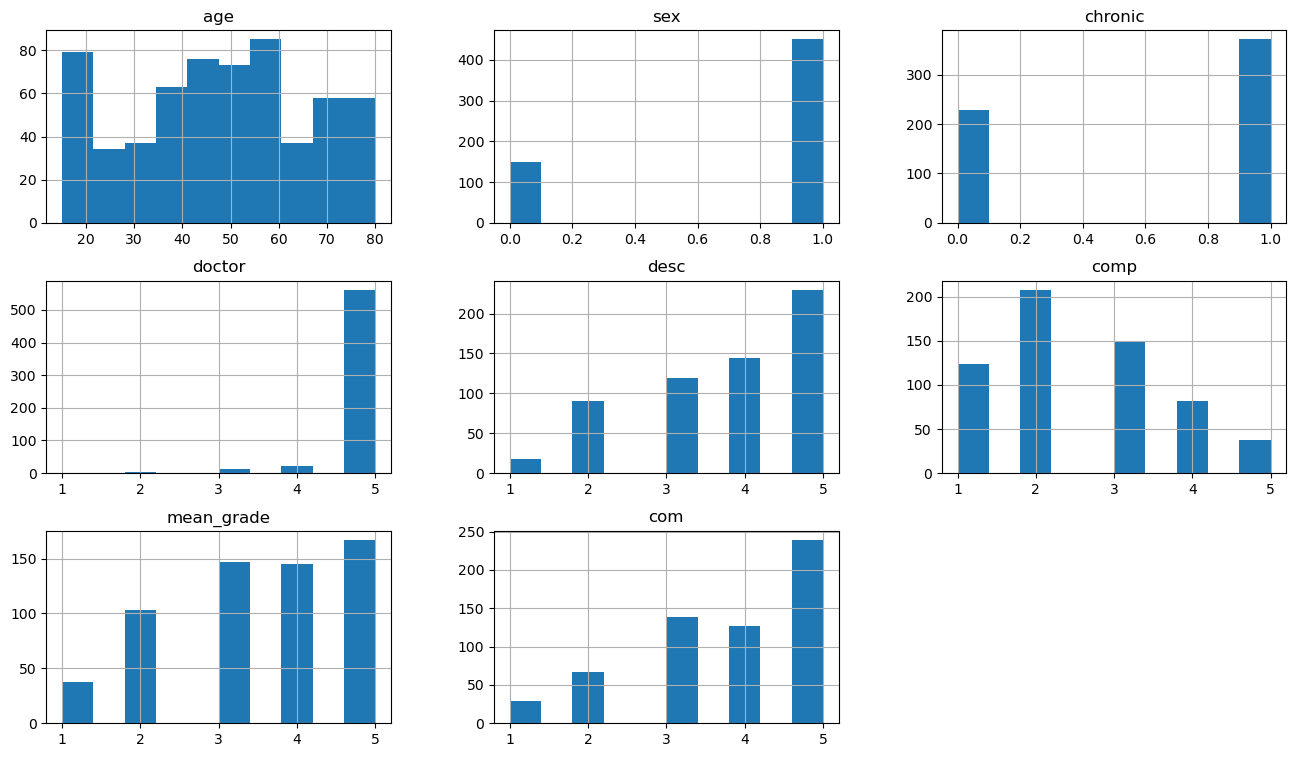

In [14]:
df3.hist(figsize=(16,9))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chronic'}>],
       [<Axes: title={'center': 'doctor'}>,
        <Axes: title={'center': 'desc'}>,
        <Axes: title={'center': 'comp'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>, <Axes: >]], dtype=object)

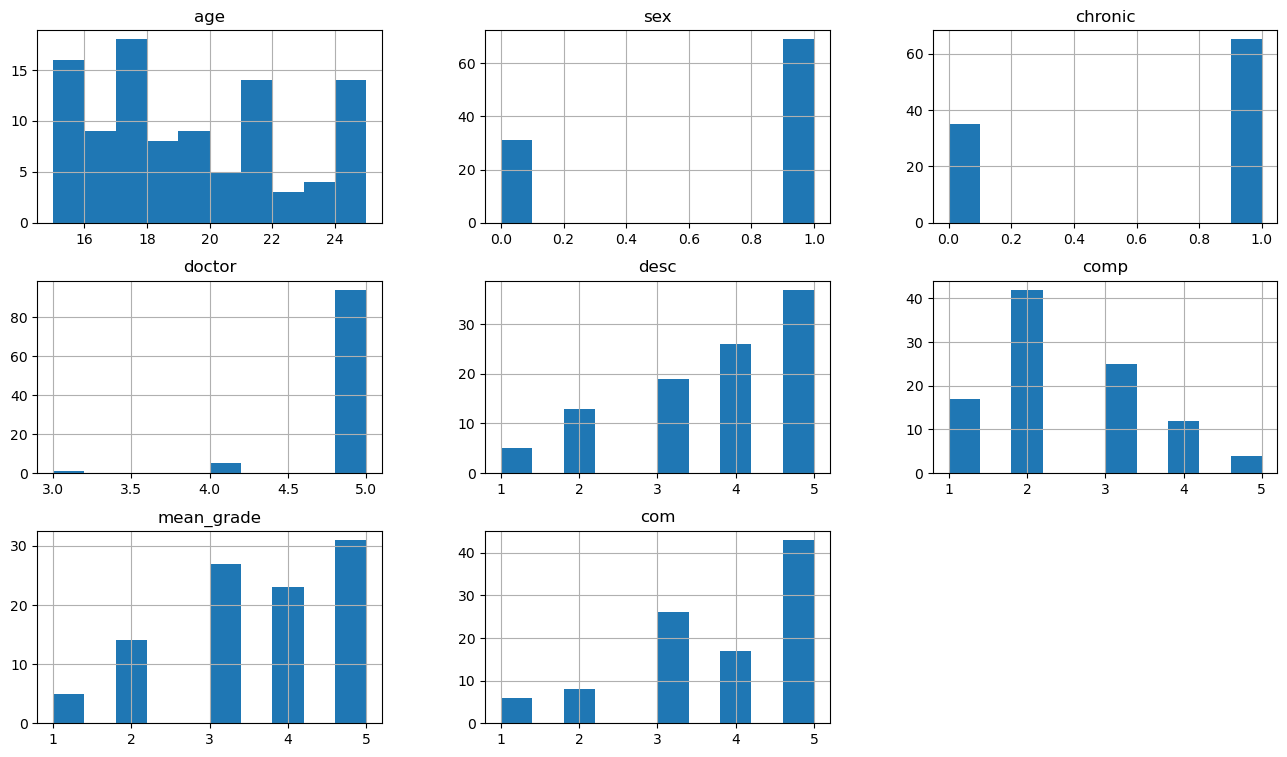

In [15]:
df3[df3['age']<=25].hist(figsize=(16,9))

In [16]:
for i in df3.columns[3:]:
    print(f"{len(df3[(df3['age']<=25) & (df3[i]<3)])/len(df3[(df3['age']<=25)][[i]])*100} процентов пользователей отметили полезность {i} в карточке товара как 'меньше 3 из 5 баллов'")

0.0 процентов пользователей отметили полезность doctor в карточке товара как 'меньше 3 из 5 баллов'
18.0 процентов пользователей отметили полезность desc в карточке товара как 'меньше 3 из 5 баллов'
59.0 процентов пользователей отметили полезность comp в карточке товара как 'меньше 3 из 5 баллов'
19.0 процентов пользователей отметили полезность mean_grade в карточке товара как 'меньше 3 из 5 баллов'
14.000000000000002 процентов пользователей отметили полезность com в карточке товара как 'меньше 3 из 5 баллов'


#### Изменения в ТЗ: оставить прежним
#### Рекомендации ритейлеру: рассмотреть возможность добавить среднюю оценку товара, отзывы в карточку товара

Продуктовый ритейлер

![Alt text](image-3.png)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'allergy'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>,
        <Axes: title={'center': 'com_with_photo_video'}>]], dtype=object)

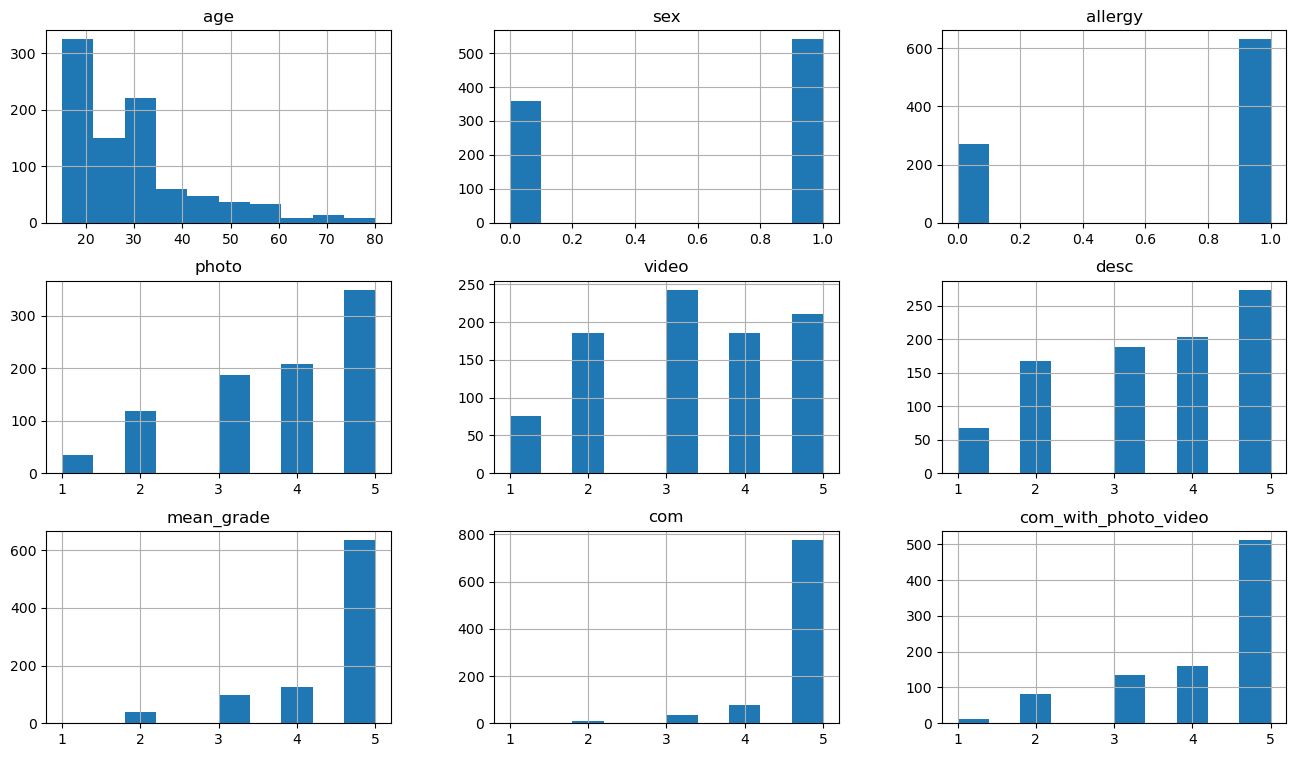

In [17]:
df4.hist(figsize=(16,9))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'allergy'}>],
       [<Axes: title={'center': 'photo'}>,
        <Axes: title={'center': 'video'}>,
        <Axes: title={'center': 'desc'}>],
       [<Axes: title={'center': 'mean_grade'}>,
        <Axes: title={'center': 'com'}>,
        <Axes: title={'center': 'com_with_photo_video'}>]], dtype=object)

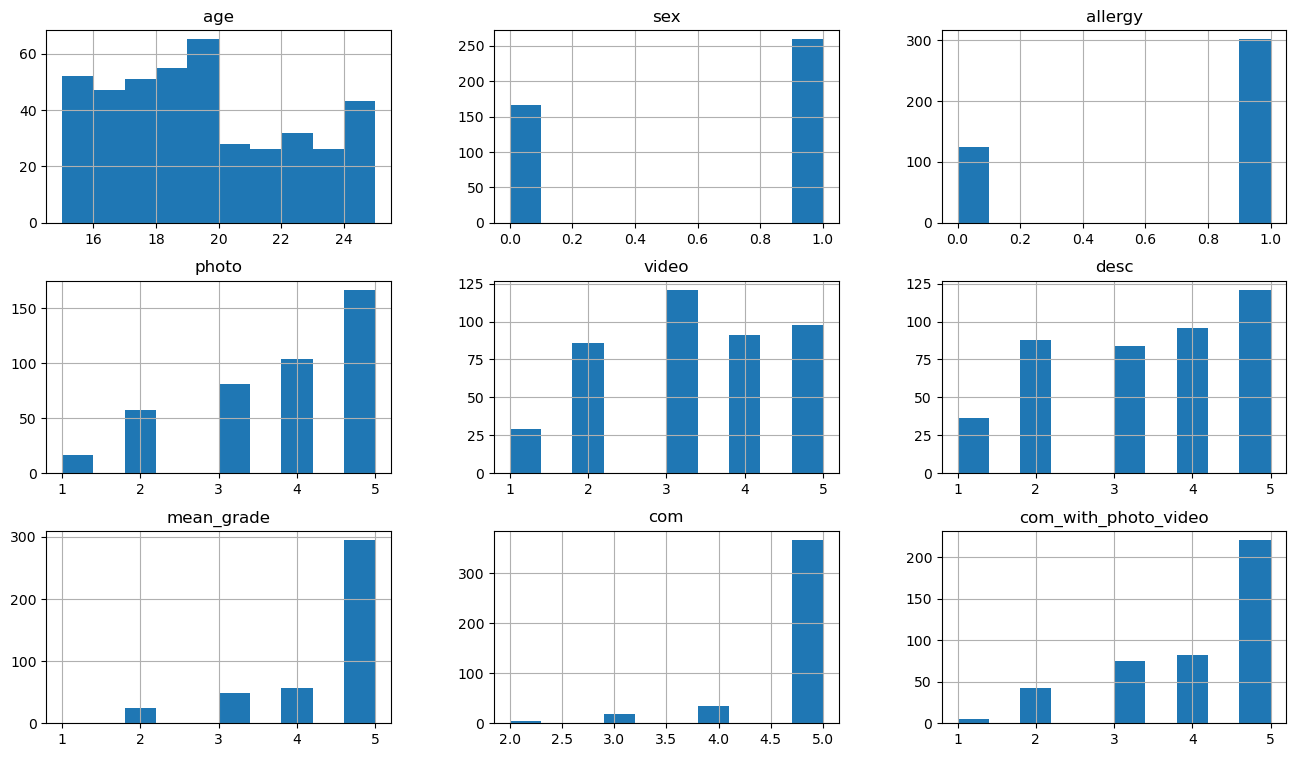

In [18]:
df4[df4['age']<=25].hist(figsize=(16,9))

In [19]:
for i in df4.columns[3:]:
    print(f"{len(df4[(df4['age']<=25) & (df4[i]<3)])/len(df4[(df4['age']<=25)][[i]])*100} процентов пользователей отметили полезность {i} в карточке товара как 'меньше 3 из 5 баллов'")

17.176470588235293 процентов пользователей отметили полезность photo в карточке товара как 'меньше 3 из 5 баллов'
27.058823529411764 процентов пользователей отметили полезность video в карточке товара как 'меньше 3 из 5 баллов'
29.176470588235293 процентов пользователей отметили полезность desc в карточке товара как 'меньше 3 из 5 баллов'
5.88235294117647 процентов пользователей отметили полезность mean_grade в карточке товара как 'меньше 3 из 5 баллов'
1.1764705882352942 процентов пользователей отметили полезность com в карточке товара как 'меньше 3 из 5 баллов'
11.058823529411764 процентов пользователей отметили полезность com_with_photo_video в карточке товара как 'меньше 3 из 5 баллов'


#### Изменения в ТЗ: оставить прежним
#### Рекомендации ритейлеру: рассмотреть возможность добавления функции средней оценки товара